In [154]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
import numpy_financial as npf
import plotly.express as px
# Establecer el estilo de fondo
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

## Archivos proporcionados

En el primer archivo "operaciones.csv" están las operaciones realizadas por los clientes (identificados por la columna CODCLAVECIC), la cantidad de dólares cambiados y el precio al que se cambiaron. **Además contiene la fecha y hora en la que se realizó cada operación.**

El segundo archivo "segmentos.xlsx" contiene la información de a qué SEGMENTO pertenece cada cliente de la tabla "operaciones.csv".

El tercer archivo "vinculacion.parquet" contiene un indicador del nivel de vinculacion del cliente con el BCP que se actualiza todos los meses.

## Ejercicio 1

#### Parte 1:

a) Lea los archivos proporcionados.

b) Calcule (i) la cantidad total y (ii) el ingreso promedio para cada segmento de clientes (Hint: el ingreso se calcula como PxQ).

Los clientes de la tabla "operaciones.csv" que NO aparecen en la tabla de "segmentos.xlsx" son "NO SEGMENTADOS".
 

### **Pregunta A**

In [155]:
operaciones=pd.read_csv('operaciones.csv',sep=',')
operaciones.head()

,CODCLAVECIC,FECHA,HORA,CANTIDAD,PRECIO
0,14500,01/03/22,08:51:03,"2,000,000.00",20.00
1,2705162,01/03/22,09:01:44,"100,000.00",60.00
2,47638,01/03/22,09:02:58,"120,000.00",250.00
3,1570837,01/03/22,09:03:28,"5,000.00",220.00
4,83580,01/03/22,09:06:16,"5,000.00",300.00


In [156]:
segmentos=pd.read_excel('segmentos.xlsx')
segmentos.head()

,CODCLAVECIC,SEGMENTO
0,24640513,PYME
1,9164066,NEGOCIOS
2,137683,PYME
3,7907034,PYME
4,7651274,PYME


In [157]:
vinculacion=pd.read_parquet('vinculacion.parquet')
vinculacion.head()

,codclavecic,codmes,SoW
0,7770924,202212,0.00
2,24800643,202212,0.08
5,21508521,202212,0.00
6,19335572,202212,1.00
7,32595,202212,0.00


### **Pregunta B**

In [158]:
resultado = pd.merge(operaciones, segmentos, on='CODCLAVECIC', how='inner')
resultado['Hint']=resultado['CANTIDAD']*resultado['PRECIO']
resultado.head()

,CODCLAVECIC,FECHA,HORA,CANTIDAD,PRECIO,SEGMENTO,Hint
0,14500,01/03/22,08:51:03,"2,000,000.00",20.00,CORPORATIVA,"40,000,000.00"
1,2705162,01/03/22,09:01:44,"100,000.00",60.00,SENIOR,"6,000,000.00"
2,47638,01/03/22,09:02:58,"120,000.00",250.00,NEGOCIOS,"30,000,000.00"
3,1570837,01/03/22,09:03:28,"5,000.00",220.00,JUNIOR,"1,100,000.00"
4,83580,01/03/22,09:06:16,"5,000.00",300.00,NEGOCIOS,"1,500,000.00"


In [159]:
# la cantidad total
cantidad_total=resultado.groupby('SEGMENTO')['CANTIDAD'].sum()
cantidad_total=pd.DataFrame(cantidad_total)
cantidad_total.reset_index(inplace=True)
cantidad_total.head()

,SEGMENTO,CANTIDAD
0,CORPORATIVA,"1,936,965,338.71"
1,INSTITUCIONAL,"194,675,814.16"
2,JUNIOR,"1,226,068,516.29"
3,MULTINACIONAL,"678,133,346.33"
4,NEGOCIOS,"1,233,981,637.72"


In [160]:
# Promedio total
promedio_total=resultado.groupby('SEGMENTO')['Hint'].mean()
promedio_total=pd.DataFrame(promedio_total)
promedio_total.reset_index(inplace=True)
promedio_total.head()

,SEGMENTO,Hint
0,CORPORATIVA,"55,277,837.73"
1,INSTITUCIONAL,"14,515,978.35"
2,JUNIOR,"8,106,515.38"
3,MULTINACIONAL,"33,948,638.44"
4,NEGOCIOS,"9,794,992.33"


**Respuesta**

In [161]:
pregunta_b = pd.merge(cantidad_total, promedio_total, on='SEGMENTO', how='inner')
pregunta_b.head()

,SEGMENTO,CANTIDAD,Hint
0,CORPORATIVA,"1,936,965,338.71","55,277,837.73"
1,INSTITUCIONAL,"194,675,814.16","14,515,978.35"
2,JUNIOR,"1,226,068,516.29","8,106,515.38"
3,MULTINACIONAL,"678,133,346.33","33,948,638.44"
4,NEGOCIOS,"1,233,981,637.72","9,794,992.33"


#### Parte 2:

c) Calcule la cantidad total MENSUAL para clientes con "SoW" mayor a 60%

Considere que el "SoW" mostrado en la tabla "vinculacion.parquet" se actualiza cada mes para cada cliente.

d) Realice un gráfico sencillo que muestre sus resultados. (En caso utilice librerías, puede utilizar la de su preferencia).

### **Pregunta C**

In [162]:
vinculacion.rename(columns={'codclavecic': 'CODCLAVECIC'}, inplace=True)
vinculacion.head()

,CODCLAVECIC,codmes,SoW
0,7770924,202212,0.00
2,24800643,202212,0.08
5,21508521,202212,0.00
6,19335572,202212,1.00
7,32595,202212,0.00


In [163]:
print(vinculacion['CODCLAVECIC'].dtype)
print(segmentos['CODCLAVECIC'].dtype)
vinculacion['CODCLAVECIC'] = vinculacion['CODCLAVECIC'].astype(int)
print(vinculacion['CODCLAVECIC'].dtype)
print(segmentos['CODCLAVECIC'].dtype)

object
int64
int32
int64


In [164]:
pregunta_c = pd.merge(vinculacion, segmentos, on='CODCLAVECIC', how='inner')
pregunta_c.head()

,CODCLAVECIC,codmes,SoW,SEGMENTO
0,4848437,202212,0.27,NEGOCIOS
1,3579927,202212,1.00,PYME
2,1092560,202212,0.34,PYME
3,12192841,202212,0.27,PYME
4,7138370,202212,0.33,PYME


In [165]:
pregunta_c = pregunta_c.groupby(['CODCLAVECIC','codmes'])['SoW'].sum()
pregunta_c=pd.DataFrame(pregunta_c)
pregunta_c.reset_index(inplace=True)
pregunta_c.head()

,CODCLAVECIC,codmes,SoW
0,66,202201,1.00
1,66,202202,1.00
2,66,202203,1.00
3,66,202204,1.00
4,66,202205,1.00


**Respuesta pregunta C**

In [166]:
pregunta_c=pregunta_c[pregunta_c['SoW']>0.60]
pregunta_c['year']=pregunta_c['codmes'] // 100
pregunta_c['month']=pregunta_c['codmes'] % 100
pregunta_c['codmes']=pd.to_datetime(pregunta_c['year'].astype(str) + pregunta_c['month'].astype(str), format='%Y%m')
pregunta_c.sample(10)

,CODCLAVECIC,codmes,SoW,year,month
181652,14369013,2022-08-01,1.00,2022,8
212087,19728050,2022-01-01,0.97,2022,1
181013,14308194,2022-10-01,1.00,2022,10
81650,5843640,2022-03-01,1.00,2022,3
213159,19796782,2022-02-01,1.00,2022,2
130068,9266778,2022-01-01,0.66,2022,1
219411,21423398,2022-01-01,1.00,2022,1
90132,6466920,2022-01-01,1.00,2022,1
247860,23788175,2022-03-01,1.00,2022,3
76289,5491282,2022-03-01,0.80,2022,3


### **Respuesta pregunta D**

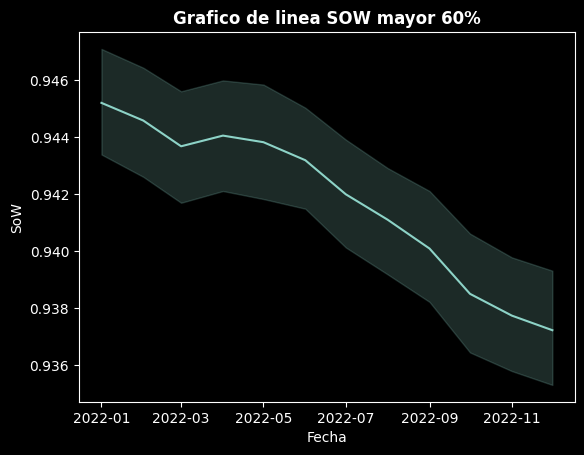

In [167]:
sns.lineplot(data=pregunta_c,x='codmes',y='SoW')
plt.title('Grafico de linea SOW mayor 60%',weight='bold')
plt.xlabel('Fecha')
plt.show()

## Ejercicio 2

#### Parte 1:

a) Cree una función que calcule el VAN, a partir de un vector de "flujos de caja" y una tasa de descuento. Su función debe funcionar para vectores de diferentes dimensiones.

La fórmula de VAN está dada por:

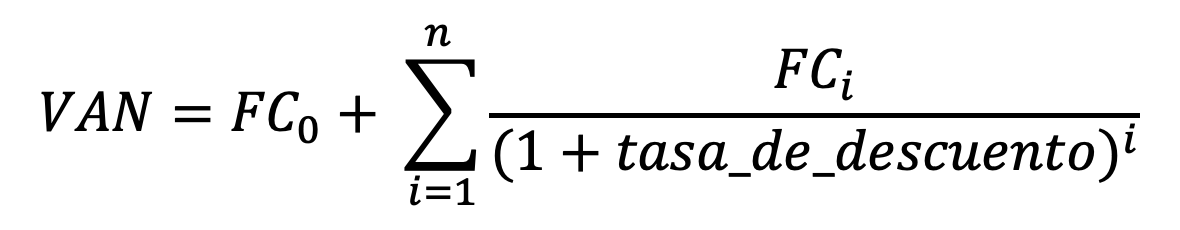

### **Pregunta A**

In [168]:
#Proyecto de ejemplo:

vector_de_flujos = [-1900, 255, 227, 250, 158, 298, 199, 150, 169, 278, 188]
tasa_de_descuento = 0.0146
segmento = "CONSUMO"

In [169]:
print(pregunta_b['SEGMENTO'].values)

['CORPORATIVA' 'INSTITUCIONAL' 'JUNIOR' 'MULTINACIONAL' 'NEGOCIOS' 'PYME'
 'SENIOR']


In [170]:
def obtener_hint(segmento):
    hint = pregunta_b.loc[pregunta_b['SEGMENTO'] == segmento, 'Hint'].iloc[0]
    print("Hint de", segmento + ":", hint)

# Llamar a la función para cada segmento
obtener_hint('CORPORATIVA')
obtener_hint('INSTITUCIONAL')
obtener_hint('JUNIOR')
obtener_hint('MULTINACIONAL')
obtener_hint('NEGOCIOS')
obtener_hint('PYME')
obtener_hint('SENIOR')

Hint de CORPORATIVA: 55277837.72821256
Hint de INSTITUCIONAL: 14515978.348999366
Hint de JUNIOR: 8106515.377177799
Hint de MULTINACIONAL: 33948638.44195911
Hint de NEGOCIOS: 9794992.325701715
Hint de PYME: 7627090.538178254
Hint de SENIOR: 14136086.910354057


In [171]:
def van(segmento):
    FCo = pregunta_b.loc[pregunta_b['SEGMENTO'] == segmento, 'Hint'].iloc[0]
    VAN = sum([flujo / (1 + tasa_de_descuento) ** indice for indice, flujo in enumerate(vector_de_flujos)]) - FCo
    return VAN
# Llamar a la función para cada segmento
print(van('CORPORATIVA'))
print(van('INSTITUCIONAL'))
print(van('JUNIOR'))
print(van('MULTINACIONAL'))
print(van('NEGOCIOS'))
print(van('PYME'))
print(van('SENIOR'))

-55277725.171042226
-14515865.791829031
-8106402.820007464
-33948525.88478878
-9794879.76853138
-7626977.981007919
-14135974.353183722


#### Parte 2:

b) Cree una función que señale si debemos aprobar un crédito, a partir de un vector de "flujos de caja" y el segmento del cliente. (Hint: utilice sus conocimientos financieros para definir el criterio a partir del valor del VAN).

Considere que los segmentos "BEX" y "ENALTA" tienen una tasa de descuento de 0.0122; y el segmento "CONSUMO" de 0.0146

### **Pregunta B**

In [172]:
bex=0.0122
consumo=0.0146
def van(segmento,tasa_de_descuento):
    FCo = pregunta_b.loc[pregunta_b['SEGMENTO'] == segmento, 'Hint'].iloc[0]
    VAN = sum([flujo / (1 + tasa_de_descuento) ** indice for indice, flujo in enumerate(vector_de_flujos)]) - FCo
    return VAN
# Crear un diccionario con los datos
datos = {
    'Segmento': ['CORPORATIVA', 'INSTITUCIONAL', 'JUNIOR', 'MULTINACIONAL', 'NEGOCIOS', 'PYME', 'SENIOR'],
    'Bex_VAN': [van('CORPORATIVA', bex), van('INSTITUCIONAL', bex), van('JUNIOR', bex), 
                van('MULTINACIONAL', bex), van('NEGOCIOS', bex), van('PYME', bex), van('SENIOR', bex)],
    'Consumo_VAN': [van('CORPORATIVA', consumo), van('INSTITUCIONAL', consumo), van('JUNIOR', consumo), 
                    van('MULTINACIONAL', consumo), van('NEGOCIOS', consumo), van('PYME', consumo), van('SENIOR', consumo)]
}

# Crear un DataFrame a partir del diccionario
df_bex_consumo = pd.DataFrame(datos)

# Función para aplicar estilos condicionales
def highlight_max(row):
    """
    Función para sombrear de rojo la celda en 'Bex_VAN' si es mayor que en 'Consumo_VAN',
    o en 'Consumo_VAN' si es mayor que en 'Bex_VAN'.
    """
    styles = [''] * len(row)
    max_column = 'Bex_VAN' if row['Bex_VAN'] > row['Consumo_VAN'] else 'Consumo_VAN'
    max_index = row.index.get_loc(max_column)
    styles[max_index] = 'background-color: red'
    return styles

# Aplicar la función a las filas del DataFrame
styled_df = df_bex_consumo.style.apply(highlight_max, axis=1)

# Mostrar el DataFrame estilizado
styled_df


,Segmento,Bex_VAN,Consumo_VAN
0,CORPORATIVA,-55277700.192015,-55277725.171042
1,INSTITUCIONAL,-14515840.812802,-14515865.791829
2,JUNIOR,-8106377.840981,-8106402.820007
3,MULTINACIONAL,-33948500.905762,-33948525.884789
4,NEGOCIOS,-9794854.789505,-9794879.768531
5,PYME,-7626953.001981,-7626977.981008
6,SENIOR,-14135949.374157,-14135974.353184


#### Parte 3:

c) Cree un vector de tasas entre 0% (0.0000) y 5% (0.0500) con incrementos de 10 puntos básicos entre ellas (Hint: 1 punto básico es igual a 0.0001).

d) A partir de la función de la pregunta (a) y el vector de la pregunta (c); cree un gráfico que muestre la relación entre la tasa de descuento y el VAN. Use el proyecto de ejemplo en su respuesta. (En caso utilice librerías, puede utilizar la de su preferencia).

In [173]:
# Pregunta C
# Definir el rango de tasas
tasa_inicial = 0.0
tasa_final = 0.05
incremento = 0.001  # Esto equivale a 10 puntos básicos
# Crear el vector de tasas
vector_de_tasas = np.arange(tasa_inicial, tasa_final + incremento, incremento)
# Imprimir el vector de tasas
print(vector_de_tasas)

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05 ]


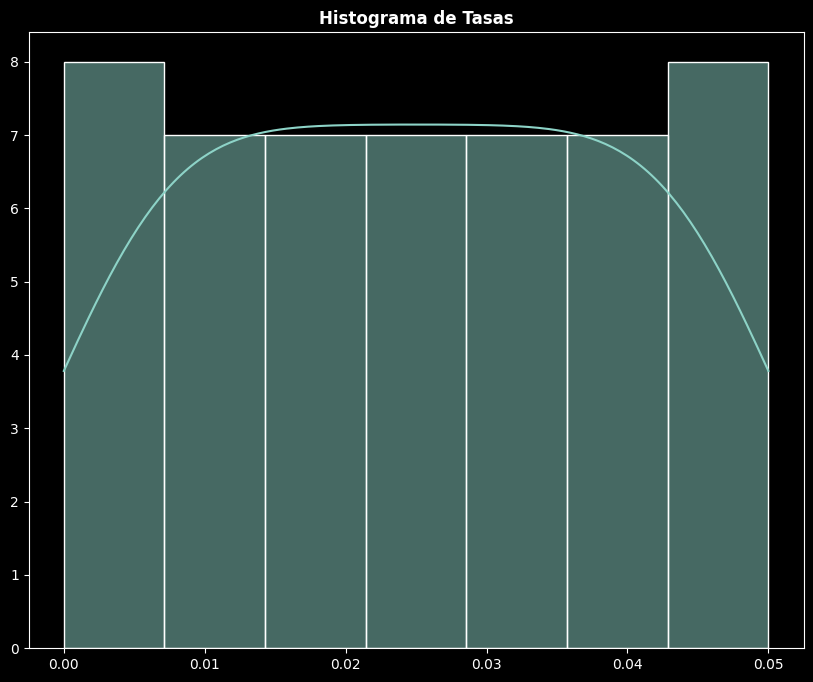

In [174]:
plt.figure(figsize=(10,8))
sns.histplot(vector_de_tasas,kde=True)
plt.title('Histograma de Tasas', fontsize=12,weight='bold')
plt.ylabel('')
plt.show()

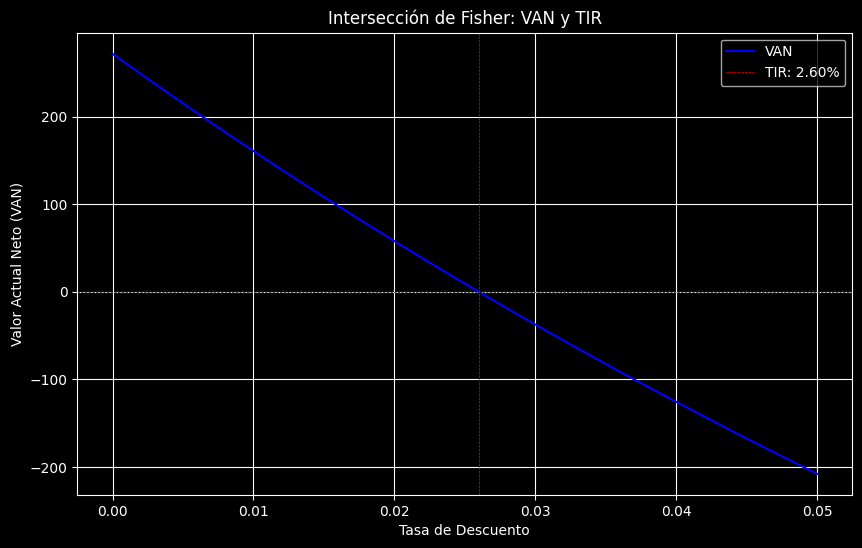

In [175]:
# Definir la serie de flujos de efectivo del proyecto de inversión
flujos_de_efectivo = [-1900, 255, 227, 250, 158, 298, 199, 150, 169, 278, 188]

# Calcular el VAN para diferentes tasas de descuento
vector_de_tasas
vans = [npf.npv(tasa, flujos_de_efectivo) for tasa in vector_de_tasas]

# Calcular la TIR
tir = npf.irr(flujos_de_efectivo)
# Definir los datos
data = {'Tasa de Descuento': vector_de_tasas, 'VAN': vans}
df_tax = pd.DataFrame(data)
# Grafico van y tir
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tax, x='Tasa de Descuento', y='VAN', color='blue', label='VAN')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)  # Línea horizontal en el eje y en VAN = 0
plt.axvline(x=tir, color='red', linestyle='--', linewidth=0.5, label=f'TIR: {tir:.2%}')  # Línea vertical en la TIR
plt.title('Intersección de Fisher: VAN y TIR')
plt.xlabel('Tasa de Descuento')
plt.ylabel('Valor Actual Neto (VAN)')
plt.legend()
plt.grid(True)
plt.show()

#### Parte 4:

e) La TIR se define como la tasa de descuento que hace que el VAN sea igual a cero. Aproximadamente, ¿cuál sería la TIR del proyecto de ejemplo? (Hint: puede apoyarse en el gráfico de la pregunta (c)).

f) Cree una función que _aproxime_ la TIR, a partir de un vector de "flujos de caja". En esta pregunta hay libertad creativa; puede incluir más argumentos en su función si lo considera necesario. Indique las limitaciones de su función. (Hint: no necesita usar librerías de optimización).

**Pregunta E**

In [176]:
# Calcular la TIR
tir = npf.irr(flujos_de_efectivo)

print(f"La TIR del proyecto de ejemplo es aproximadamente: {tir:.2%}")

La TIR del proyecto de ejemplo es aproximadamente: 2.60%


**Pregunta F**

In [177]:
def approx_tir(flujos_de_efectivo, iter_max=1000, tol=1e-6):
    """
    Aproxima la TIR de un proyecto a partir de un vector de flujos de efectivo.

    Parameters:
        flujos_de_efectivo (list): Lista de flujos de efectivo del proyecto.
        iter_max (int): Número máximo de iteraciones permitidas.
        tol (float): Tolerancia para la convergencia.

    Returns:
        float: Aproximación de la TIR del proyecto.
    """
    # Función para calcular el VAN
    def calculate_van(rate):
        return sum([cf / (1 + rate) ** i for i, cf in enumerate(flujos_de_efectivo)])

    # Aproximaciones iniciales de la TIR
    x0 = 0.0
    x1 = 0.1

    # Iterar utilizando el método de la secante
    for i in range(iter_max):
        f0 = calculate_van(x0)
        f1 = calculate_van(x1)
        if abs(f1 - f0) < tol:
            break
        x_next = x1 - f1 * (x1 - x0) / (f1 - f0)
        x0, x1 = x1, x_next

    return x1

# Ejemplo de uso
tir_aproximada = approx_tir(flujos_de_efectivo)
print(f"TIR Aproximada: {tir_aproximada*100} %")


TIR Aproximada: 2.5999402726909575 %
